# Ocean Data Challenge
## AutoInsight Challenge: Navigating Through Doug’s Car Scores
### Research - NLP Potentital

### Luca Ordronneau

# Import Librairies

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
DATA_FILE = "./data/DougScore.csv"

In [3]:
data = pd.read_csv(DATA_FILE)

In [4]:
# Drop the unnecessary rows
df = data.iloc[2:].copy()

columns = [
    'Year', 'Brand', 'Model', 'Styling', 'Acceleration', 'Handling', 'Fun_Factor', 
    'Cool_Factor', 'Weekend_Total', 'Features', 'Comfort', 'Quality', 'Practicality', 
    'Value', 'Daily_Total', 'DougScore', 'Video_Link', 'Filming_Location', 'State', 'Vehicle_Country'
]
df.columns = columns

df.reset_index(drop=True, inplace=True)

# Convert columns to appropriate data types
numerical_columns = [
    'Year', 'Styling', 'Acceleration', 'Handling', 'Fun_Factor', 'Cool_Factor',
    'Weekend_Total', 'Features', 'Comfort', 'Quality', 'Practicality', 'Value', 
    'Daily_Total', 'DougScore'
]
df[numerical_columns] = df[numerical_columns].astype(float)

df.head()


,Year,Brand,Model,Styling,Acceleration,Handling,Fun_Factor,Cool_Factor,Weekend_Total,Features,Comfort,Quality,Practicality,Value,Daily_Total,DougScore,Video_Link,Filming_Location,State,Vehicle_Country
0,2020.0,McLaren,Speedtail,8.0,10.0,10.0,10.0,10.0,48.0,7.0,4.0,7.0,2.0,6.0,26.0,74.0,38:57:00,Columbus,Ohio,UK
1,1994.0,McLaren,F1,8.0,9.0,10.0,10.0,10.0,47.0,2.0,3.0,9.0,3.0,10.0,27.0,74.0,39:50:00,Burbank,California,UK
2,2022.0,Lucid,Air Dream Edition,7.0,10.0,6.0,7.0,8.0,38.0,9.0,8.0,7.0,5.0,6.0,35.0,73.0,39:40:00,Los Angeles,California,USA
3,2022.0,GMC,Hummer EV Pickup,5.0,9.0,4.0,9.0,7.0,34.0,9.0,7.0,7.0,9.0,7.0,39.0,73.0,33:42:00,Detroit,Michigan,USA
4,2021.0,Rivian,R1T,7.0,9.0,5.0,9.0,7.0,37.0,7.0,6.0,6.0,9.0,8.0,36.0,73.0,44:48:00,San Diego,California,USA


# Clustering

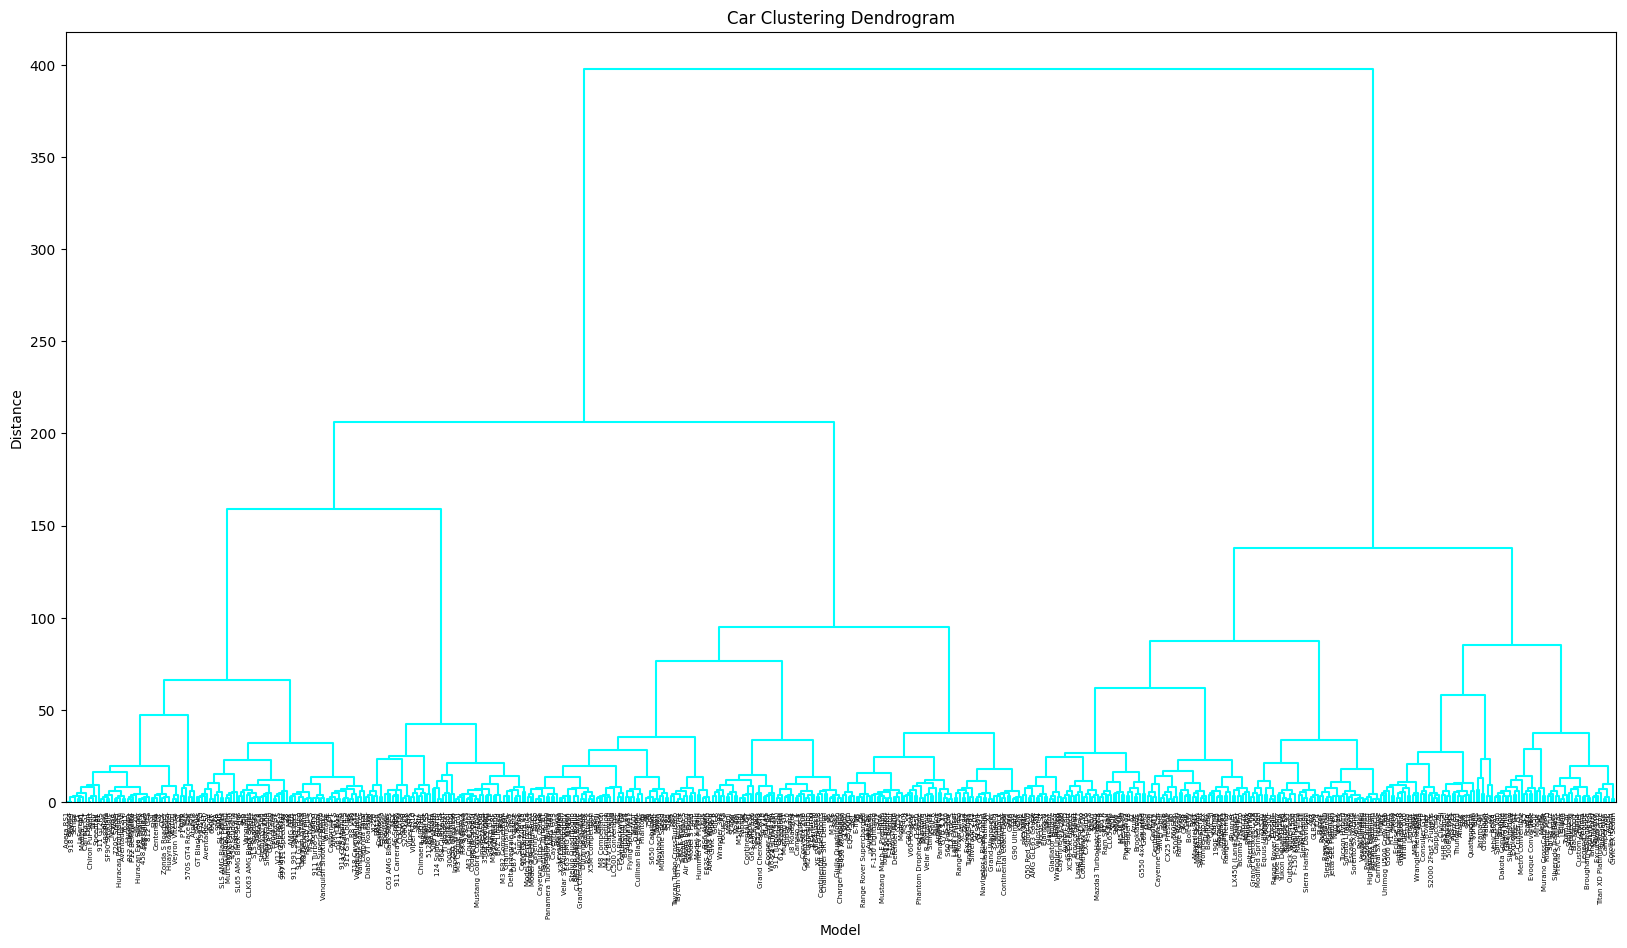

In [5]:
# Selecting numerical columns related to car scores for clustering
clustering_features = [
    'Styling', 'Acceleration', 'Handling', 'Fun_Factor', 'Cool_Factor', 
    'Weekend_Total', 'Features', 'Comfort', 'Quality', 'Practicality', 'Value', 
    'Daily_Total', 'DougScore'
]

# Prepare data for clustering
clustering_data = df[clustering_features]

# Using hierarchical clustering
linked = linkage(clustering_data, method='ward')

# Creating a Dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linked,
           orientation='top',
           labels=df['Model'].values,
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=0,
           above_threshold_color='cyan')

# Styling the plot
plt.title('Car Clustering Dendrogram')
plt.xlabel('Model')
plt.ylabel('Distance')
plt.show()

In [6]:
from scipy.spatial.distance import pdist, squareform

# Car model specified by the user
selected_model = "ID.4"

if selected_model in df['Model'].values:
    selected_car_features = df[df['Model'] == selected_model][clustering_features].iloc[0]

    # Compute the pairwise distances between all cars
    pairwise_distances = pdist(clustering_data, metric='euclidean')
    distance_matrix = squareform(pairwise_distances)

    selected_car_index = df[df['Model'] == selected_model].index[0]

    # Extracting distances related to the selected car
    selected_car_distances = distance_matrix[selected_car_index]

    # Finding the indices of the five closest cars
    closest_indices = selected_car_distances.argsort()[1:6]  # Excluding the first one as it's the car itself

    closest_cars = df.iloc[closest_indices][['Brand', 'Model']]
else:
    closest_cars = f"The model '{selected_model}' was not found in the dataset."

closest_cars

,Brand,Model
426,Cadillac,XT4
445,Dodge,Ram 1500
435,Ford,F-150 King Ranch
411,Mercedes-Benz,GLB250
434,GMC,Yukon Denali Diesel


# NLP Analysis

In [7]:
from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper

In [8]:
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

In [9]:
models = ['McLaren Speedtail',
 'McLaren F1',
 'Lucid Air Dream Edition',
 'GMC Hummer EV Pickup',
 'Rivian R1T',
 'Tesla Model S Plaid',
 'Bugatti Divo',
 'Bugatti Chiron Pur Sport',
 'Bugatti Chiron',
 'Ferrari Monza SP1',
 'Mercedes AMG E63 Wagon',
 'Rimac Nevera',
 'Koenigsegg Regera',
 'McLaren Sabre',
 'Ferrari SF90 Stradale',
 'Audi RS6 Avant',
 'Porsche Taycan Turbo S',
 'Ferrari LaFerrari',
 'Ferrari 488 Pista',
 'Koenigsegg Agera RS1',
 'Mercedes-Benz GT63S 4-Door',
 'Mercedes-Benz E63S AMG Wagon',
 'Porsche 918 Spyder',
 'Tesla Model X Plaid',
 'Porsche Taycan GTS Sport Turismo',
 'Porsche Taycan Turbo CrossTurismo',
 'Audi RS E-Tron GT',
 'Ferrari 812 GTS',
 'Ferrari 812 Superfast',
 'Ferrari F8 Tributo',
 'Lamborghini Huracan Evo Spyder',
 'McLaren P1',
 'McLaren Senna',
 'Lamborghini Urus',
 'Ferrari 458 Speciale A',
 'Porsche 911 GT2RS',
 'Lamborghini Huracan',
 'Porsche Carrera GT',
 'McLaren Elva',
 'Porsche Cayenne Turbo GT',
 'Ferrari F12 Berlinetta',
 'Ferrari Roma',
 'McLaren 765LT',
 'Aston Martin Vanquish Shooting Brake',
 'Audi RS7',
 'Lamborghini Centenario',
 'Porsche Cayenne Turbo S Coupe',
 'Ford GT',
 'McLaren 720S Spider',
 'Ferrari 488 Spider',
 'Lamborghini Aventador SVJ',
 'Lamborghini Huracan Performante',
 'Maserati MC20',
 'BMW M5',
 'Audi RSQ8',
 'Porsche 911 Turbo S (992)',
 'Pagani Zonda S Roadster',
 'Pagani Huayra Roadster',
 'Pagani Huayra',
 'Koenigsegg CCX',
 'Porsche Cayenne Turbo',
 'Aston Martin DBS Superleggera',
 'Bentley Continental GT',
 'Ferrari Portofino',
 'McLaren 720S',
 'BMW M760i',
 'Audi R8 V10 Plus',
 'Acura NSX Type S',
 'Ford Mustang Mach-E GT',
 'Cadillac CT5-V Blackwing',
 'Porsche 911 GT3 Touring',
 'BMW Alpina XB7',
 'Porsche 911 GT3',
 'BMW M3',
 'Dodge Ram TRX',
 'Bugatti Veyron Vitesse',
 'Audi RS7',
 'BMW X5M Competition',
 'Bentley Bentayga V8',
 'McLaren 675LT',
 'Tesla Model Y Performance',
 'Rolls-Royce Cullinan Black Badge',
 'Audi RS5 Sportback',
 'Rolls-Royce Cullinan',
 'Ford GT',
 'Porsche Panamera Turbo Sport Turismo',
 'Rolls-Royce Phantom',
 'Audi R8 Decennium',
 'Bentley Flying Spur W12',
 'Porsche Cayman GT4RS',
 'Porsche 911 GTS Coupe',
 'Mecedes-AMG GT Black Series',
 'Mercedes-Benz AMG GTR',
 'Dodge Durango Hellcat',
 'McLaren 650S',
 'Porsche Cayenne GTS',
 'Mercedes - Benz AMG G63',
 'Ferrari 599 GTO',
 'Porsche 911 991 Speedster',
 'Tesla Model 3 Performance',
 'McLaren GT',
 'Porsche 911 Carrera S',
 'Bugatti Veyron',
 'Aston Martin DB11 AMR',
 'Audi R8 V10',
 'Aston Martin Vantage',
 'Ferrari California T',
 'Mercedes-Benz AMG GT S',
 'Ford GT',
 'Lamborghini Aventador SV',
 'Porsche Panamera Turbo',
 'Bentley Bentayga',
 'Porsche 911 C2S Manual',
 'Mercedes-Maybach S580',
 'Mercedes - Benz S580',
 'Ferrari FF',
 'Polestar 1',
 'Aston Martin Lagonda Taraf',
 'Lexus LC500 Convertible',
 'Porsche 718 Cayman GT4',
 'Range Rover Velar SV Autobiography',
 'BMW M8 Competition',
 'BMW X3M Competition',
 'McLaren 600LT',
 'Cadillac CTS-V',
 'Jaguar I-Pace',
 'BMW M850i',
 'Rolls-Royce Dawn',
 'Alfa Romeo Stelvio Quadrifoglio',
 'Alfa Romeo Stelvio Quadrifoglio',
 'Acura NSX',
 'Aston Martin DB11',
 'Audi R8',
 'Jeep Grand Cherokee Trackhawk',
 'Lexus LC 500',
 'Audi SQ7',
 'Ford F-150 Lightning',
 'Audi S8',
 'Audi S8',
 'Hyundai Ioniq 5 Limited',
 'BMW i4 M50',
 'BMW iX xDrive50',
 'Cadillac CT4-V Blackwing',
 'Ford F-150 Raptor',
 'BMW M4 Competition',
 'Mercedes - Maybach GLS600',
 'Mercedes - Benz CLS63 Shooting Brake',
 'McLaren 620R',
 'Ford Mustang Mach-E Premium',
 'Aston Martin Vantage Roadster',
 'Mercedes-Maybach S650 Cabriolet',
 'Jaguar XE SV Project 8',
 'Maserati Levante Trofeo',
 'BMW M2 Competition',
 'Nissan GT-R Nismo',
 'Porsche 959',
 'Mercedes-Benz SLS AMG Black Series',
 'Mercedes-Benz SLS AMG',
 'Porsche 911R',
 'Mercedes-Benz CLK63 AMG Black Series',
 'Chevrolet Corvette ZR1',
 'Ford Shelby GT350R',
 'Aston Martin Vanquish S Volante',
 'Dodge Challenger SRT Demon',
 'Mercedes-Benz E63 AMG Wagon',
 'Rolls-Royce Wraith',
 'Mercedes-Benz EQS 450+',
 'Ford F-150 Raptor',
 'Mercedes - Benz SLS Roadster',
 'McLaren P1 GTR',
 'Tesla Model X',
 'Chevrolet Camaro ZL1 1LE',
 'Dodge Charger Hellcat Widebody',
 'Ford Shelby GT500',
 'BMW 750i',
 'Ferrari F430 Spider',
 'BMW M3 CS',
 'Aston Martin Vanquish',
 'Porsche 911 Turbo',
 'BMW 1 Series M',
 'Bentley Mulsanne Speed',
 'Lexus LFA',
 'Ferrari GTC4Lusso',
 'Bentley Continental SuperSports',
 'Audi RS3',
 'Lexus LS 500h',
 'Mercedes-Benz Maybach S600',
 'BMW M2',
 'Land Rover Defender P400',
 'Mercedes-Benz G550',
 'Chevrolet Corvette C8',
 'Kia EV6 GT-Line',
 'Mercedes - Benz E450 AT Wagon',
 'Volvo V60 Polestar',
 'Jaguar F-Type R',
 'Porsche 996 GT2',
 'Lamborghini Murcielago Roadster',
 'Range Rover Velar R-Dynamic',
 'Mercedes-Benz CLS450',
 'Volkswagen Golf R',
 'Aston Martin V12 Vantage S',
 'Alfa Romeo Giulia Quadrifoglio',
 'Lamborghini Murcielago LP640',
 'Ford Focus RS',
 'Ferrari 430 Scuderia',
 'Mercedes-Benz SLR',
 'Chevrolet Camaro ZL1',
 'Nissan Z',
 'Toyota Supra 3.0',
 'Rolls-Royce Phantom',
 'Jeep Wrangler 392',
 'Polestar 2',
 'BAC Mono',
 'Lotus Evora GT',
 'Lincoln Aviator BL',
 'BMW M340i',
 'Rolls-Royce Phantom Drophead Coupe',
 'Audi Q8',
 'Porsche 911 GT3RS 4.0',
 'BMW i8 Roadster',
 'Audi A8L',
 'Lexus RC-F',
 'Mercedes-Benz SL65 AMG Black Series',
 'Nissan Skyline GT-R (R34)',
 'Chevrolet Corvette Z06',
 'Kia Stinger GT',
 'BMW M240i',
 'Volkswagen Golf R',
 'Jeep Grand Wagoneer',
 'Ferrari 612 Scaglietti',
 'BMW X7',
 'Genesis G80 3.5T',
 'BMW X5',
 'Audi E-Tron',
 'Land Rover Range Rover Supercharged',
 'Porsche Macan S',
 'Ferrari California',
 'Lotus Evora 400',
 'Mercedes-Benz GLE450',
 'Ford Raptor',
 'Bentley Continental GT',
 'Ford Mustang GT',
 'Lamborghini Diablo 6.0',
 'BMW Z8',
 'BMW M5',
 'Chevrolet SS',
 'Toyota Supra',
 'BMW M440i',
 'Lexus IS 500',
 'Genesis GV70',
 'Genesis G70 3.3T',
 'Ferrari F50',
 'Porsche 911 Turbo (996)',
 'Aston Martin Rapide',
 'McLaren 570S GT4 Race Car',
 'Porsche Panamera V6',
 'Lexus GS-F',
 'Genesis G90 Ultimate',
 'Mercedes-Benz GLS450',
 'Cadillac CT6',
 'BMW M5 (E39)',
 'Porsche 997 911 Speedster',
 'Ferrari F40',
 'Chevrolet Silverado ZR2',
 'Toyota Tundra TRD Pro',
 'Cadillac Escalade Platinum',
 'Lincoln Navigator L Black Label',
 'Acura TLX Type S',
 'BMW M6',
 'Audi SQ5',
 'Audi E-Tron Sportback',
 'Audi Q7 3.0T',
 'Mercedes-Benz G63 AMG 6x6',
 'Tesla Model 3',
 'Honda Civic Type R',
 'Mercedes-Benz CLK DTM',
 'BMW 850CSi',
 'Genesis G90',
 'Ford Bronco',
 'Jeep Grand Cherokee SRT8',
 'Bugatti EB110',
 'Genesis GV80',
 'Lincoln Continental Coach Door',
 'Audi Q7 3.0 T',
 'Mercedes E55 AMG',
 'Volvo S60 Polestar',
 'Maserati GranTurismo MC',
 'Bentley Arnage T',
 'BMW 330i (G20)',
 'Kia K900',
 'Mercedes-Benz SL450',
 'Lincoln Continental',
 'Porsche 911 Carrera 4S',
 'Lancia Delta Integrale Evo 2',
 'Hyundai Veloster N',
 'Lexus LX 600',
 'Volkswagen GTI',
 'Mercedes-Benz R63 AMG',
 'Toyota Land Cruiser',
 'Subaru WRX',
 'Audi RS2 Avant',
 'Jeep Gladiator Mojave',
 'Mercedes-Benz CLA45',
 'Subaru WRX STI Type RA',
 'Vector W8',
 'BMW M3 E92 Competition',
 'Audi RS6',
 'Ariel Atom 3',
 'Jaguar XJ220',
 'Chevrolet Corvette Z06 C5',
 'Toyota Land Cruiser',
 'Toyota Supra Turbo',
 'Volvo XC40 T5',
 'Mercedes-Benz C63 AMG Black Series',
 'Spyker C8 Spyder',
 'Maserati Levante',
 'Alfa Romeo 4C Spider',
 'Porsche Cayenne GTS 6M',
 'Hyundai Elantra N',
 'Toyota GR86',
 'Toyota Land Cruiser V6 TT',
 'Subaru BRZ Limited',
 'Ford Explorer ST',
 'Jeep Grand Cherokee L V8',
 'Jeep Gladiator',
 'Jaguar XKR-S',
 'Tesla Roadster',
 'Audi S6 V10',
 'Ford Focus ST',
 'Maybach 62',
 'Honda NSX',
 'Aston Martin DB7 V12 Volante',
 'Cadillac CT5-V',
 'Mini Cooper JCW GP',
 'Land Rover Range Rover Limo',
 'Lamborghini Diablo VT Roadster',
 'Volkswagen Arteon',
 'BMW Z4 sDrive30i',
 'Acura NSX',
 'Ferrari F355',
 'Jeep Wrangler Unlimited',
 'Jaguar XJ Super V8',
 'Honda S2000 CR',
 'Honda S2000',
 'Ford Bronco Sport',
 'Lexus IS350 F-Sport',
 'Mitsubishi Evolution X',
 'Maserati Coupe (6-Speed)',
 'Infiniti Q50 Red Sport 400',
 'Nissan 370Z Nismo',
 'Lexus LS 600hL',
 'Mercedes-Benz AMG GLE63 Coupe',
 'Mazda MX-5 Miata RF',
 'Fiat 500 Abarth',
 'Ferrari 250 GT Lusso',
 'Volvo XC90 Excellence',
 'BMW M3 Coupe (Euro)',
 'Subaru Solterra Touring',
 'Ford Mustang Cobra Convertible',
 'Lexus LX570',
 'Mercedes-Benz 300SL Gullwing',
 'Mercedes-Benz SLK55 AMG',
 'Subaru Impreza 22B',
 'Bentley Brooklands',
 'Lincoln Corsair',
 'Jaguar F-Pace S',
 'Subaru Impreza WRX STI',
 'BMW M3 Coupe (E46)',
 'Mercedes-Benz SL500',
 'Hyundai Equus Ultimate',
 'Land Rover Range Rover Evoque',
 'Porsche 911 Carrera RS (993)',
 'Porsche 928 GTS',
 'Mitsubishi 3000GT VR-4',
 'Mercedes-Benz G65 AMG',
 'Volkswagen Phaeton W12',
 'BMW M5 (E60)',
 'Nissan 350Z Roadster',
 'Mazda RX-8 Shinka',
 'Toyota Avalon TRD',
 'Mercedes-Benz GLC300',
 'Mercedes-Benz Modified Sprinter Van',
 'BMW 750iL',
 'Toyota 4Runner TRD Pro',
 'Ferrari Testarossa',
 'Lamborghini Countach',
 'Bentley Azure',
 'Ford Fiesta ST',
 'Mercedes - Benz CLA 250',
 'Mercedes-Benz G550 4x4 Squared',
 'Maybach 57S',
 'Lexus NX350h',
 'BMW 760Li',
 'Subaru BRZ tS',
 'Mazda CX-30 Turbo',
 'Dodge Viper RT/10',
 'Pontiac Solstice GXP',
 'BMW M5 (E34)',
 'Mercedes-Benz 500E',
 'Mini Countryman S JCW',
 'Mercedes-Benz CL65 AMG',
 'Mazda RX-7',
 'Dodge Viper GTS',
 'Fiat 124 Spider Abarth',
 'Kia Carnival SX Prestige',
 'Mazda Mazda3 Turbo Hatchback',
 'Kia Soul 1.6T',
 'Chevrolet Tahoe High Country',
 'BMW M3 (E30)',
 'Toyota Century V12',
 'Polaris Slingshot',
 'Mercedes-Benz GLB250',
 'Audi Q3',
 'Mercedes-Benz A220',
 'Toyota Century',
 'Maserati Ghibli',
 'Mazda NA Miata',
 'TVR Chimaera 400 HC',
 'Volvo S60 R',
 'Kia Telluride EX',
 'Toyota RAV4 Prime',
 'Volkswagen ID.4',
 'Porsche Cayenne Camera Car',
 'Chrysler Pacifica Pinnacle',
 'Toyota Sienna Platinum',
 'GMC Sierra Harley Davidson',
 'Cadillac XT4',
 'Dodge Ram SRT-10',
 'GMC Sierra Denali',
 'Kia K900',
 'Toyota Tacoma TRD Pro',
 'USSV Rhino GX',
 'Suzuki Jimny',
 'Toyota Mirai',
 'GMC Yukon Denali Diesel',
 'Ford F-150 King Ranch',
 'Toyota Highlander Platinum',
 'Hyundai Palisade Limited',
 'Honda Odyssey Elite',
 'Lexus LX450 (Land Cruiser)',
 'Dodge Neon SRT-4',
 'Audi TT Roadster',
 'Toyota FJ Cruiser',
 'Hummer H1 Alpha',
 'Peugeot 3008',
 'Dodge Ram 1500',
 'Aston Martin Lagonda',
 'Ferrari 348ts',
 'Lamborghini Espada',
 'Honda Civic Si',
 'Hyundai Tucson Hybird',
 'Subaru Outback Wilderness',
 'Nissan Pathfinder',
 'Fiat Multipla',
 'LaForza LaForza',
 'Porsche 968 Clubsport',
 'Fisker Karma',
 'Jeep Wrangler 6x6',
 'Bentley Turbo R',
 'Subaru Outback XT',
 'Buick Grand National',
 'Mazda Mazda3 Sedan',
 'Ferrari 512BB Boxer',
 'Maserati Ghibli SS',
 'Ford Escape Hybrid',
 'Citröen C6',
 'Subaru Ascent',
 'Ford Ranger Tremor',
 'Toyota Venza Limited',
 'Chevrolet Bolt EUV',
 'Toyota 4Runner',
 'Kia Sorento SX X-Line',
 'Kia K5 EX',
 'Toyota C-HR',
 'Chevrolet Impala SS',
 'GMC Sierra 3500 Denali',
 'Bentley Limo',
 'Mercedes-Benz G500 Cabriolet',
 'Toyota RAV4',
 'Acura Integra Type-R',
 'Mitsubishi Eclipse GSX',
 'Land Rover Range Rover',
 'Rolls-Royce Silver Spur',
 'Mercury Marauder',
 'Suzuki Cappuccino',
 'Ford Maverick XLT',
 'Hyundai Santa Cruz',
 'Mosler Consulier GTP',
 'Volkswagen XL1',
 'Mazda CX-30',
 'Citröen CX25 Prestige',
 'Chevrolet Bolt',
 'Mercedes - Benz Unimog U500 Crew Cab',
 'Honda S2000 2Fast 2Furious',
 'Mercedes-Benz S500 (W14)',
 'Mercedes-Benz 190E 2.3-16',
 'Mercedes-Benz 560SEL',
 'Subaru Baja Turbo',
 'Dodge Ram 2500 HD',
 'Honda Passport',
 'BMW i3',
 'BMW Z1',
 'Jeep Wrangler Renegade',
 'Ford F-250 Platinum',
 'Hyundai Sonata Limited',
 'GMC Typhoon',
 'Kia Niro EV',
 'Nissan Frontier Pro-4X',
 'Chevrolet Blazer',
 'Lamborghini Jalpa',
 'Autozam AZ-1',
 'Alfa Romeo RZ',
 'Suzuki Swift Boosterjet',
 'Toyota MR2 Spyder',
 'Chevrolet Colorado ZR2',
 'Lamborghini LM002',
 'Honda Beat',
 'Audi 5000 Tresser',
 'Honda Ridgeline HPD',
 'Toyota Previa S/C All-Trac',
 'Volkswagen Jetta SEL Premium',
 'Chevrolet HHR SS Panel',
 'Mini Clubvan',
 'Subaru SVX',
 'Chevrolet Silverado Trail Boss',
 'Chevrolet SSR',
 'Cadillac Eldorado',
 'Jeep Cherokee XJ',
 'Ford Ranger',
 'BMW 750iL (E32)',
 'Cadillac Allante',
 'Honda Civic Si',
 'Hyundai Venue',
 "Cadillac Brougham d'Elegance",
 'Toyota Sera',
 'Acura Legend Coupe',
 'Plymouth Prowler',
 'Lexus LS 400',
 'Maserati Quattroporte',
 'Nissan Maxima',
 'Ford Excursion V10',
 'Ford Thunderbird',
 'Lincoln Navigator',
 'Lincoln Town Car',
 'Pontiac Fiero GT',
 'Hyundai Equus',
 'Mitsubishi Sigma',
 'Chevrolet Suburban',
 'Buick Reatta',
 'Chevrolet Tahoe Hybrid',
 'Saab 9-5',
 'Jaguar XJS V12',
 'Nissan Titan XD Platinum Reserve',
 'Honda Civic EX Sedan',
 'Dodge Camper Van',
 'Lincoln Blackwood',
 'Chrysler PT Cruiser GT',
 'Oldsmobile Custom Cruiser',
 'Land Rover Evoque Convertible',
 'Pontiac Aztek',
 'Subaru Sambar Van',
 'Smart Crossblade',
 'Ford F-650',
 'Oldsmobile Silhouette',
 'Toyota Corolla Hybrid',
 'Rolls-Royce Silver Shadow',
 'Lamborghini Jarama GT',
 'Cadillac ELR',
 'Pontiac Vibe GT',
 'Mitsubishi Pajero Mini',
 'Ford Bronco',
 'Isuzu VehiCROSS',
 'Ford Explorer XLT',
 'Dodge Dakota Convertible',
 'Volga GAZ 24-10',
 'Los Res Car',
 'Geo Metro Convertible',
 'Hummer H2',
 'Ferret Tank',
 'Mitsubishi Mirage',
 'Nissan Murano CrossCabriolet',
 'Mercedes-Benz Metris',
 'Yugo GV',
 'Trabant Trabant',
 'BMW Isetta']

In [10]:
# docs = []
# for model in models:
#     result = wikipedia.run(model)
#     print(result.split('\n\n')[0])
#     print()
#     docs.append(result.split('\n\n')[0])

# from sentence_transformers import SentenceTransformer
# from sklearn.decomposition import PCA

# model = SentenceTransformer('all-MiniLM-L6-v2')

# embedding = model.encode(docs)

# pca = PCA(n_components=2)
# model_vector_dict = pca.fit_transform(embedding)

# df_models = pd.DataFrame(model_vector_dict)
# df_models['document'] = docs
# df_models['model'] = models
# df_models['brand'] = df['Brand']
# df_models['DougScore'] = df['DougScore']

In [11]:
df_models = pd.read_csv("./data/cars_description.csv", index_col=0)

In [12]:
df_models['document'][22]

"Page: Porsche 918 Spyder\nSummary: The Porsche 918 Spyder is a sports car manufactured by German marque Porsche. The 918 Spyder is a plug-in hybrid powered by a mid-mounted naturally aspirated 4.6 L (4,593 cc) V8 engine, developing 447 kW (608 PS; 599 hp) at 8,700 RPM, with two electric motors delivering an additional 210 kW (286 PS; 282 hp) for a combined output of 652 kW (875 hp) and 1,280 N⋅m (944 lbf⋅ft) of torque. The 918 Spyder's 6.8 kWh lithium-ion battery pack delivers an all-electric range of 19 km (12 mi) under the US Environmental Protection Agency's five-cycle tests.Production began on 18 September 2013, with deliveries initially scheduled to begin in December 2013, and a starting price of ≈€781,000 (US$845,000 or £711,000). The 918 Spyder was sold out in December 2014 and production ended in June 2015.The 918 Spyder was first shown as a concept at the 80th Geneva Motor Show in March 2010. On 28 July 2010, after 2,000 declarations of interest, the supervisory board of Pors

In [13]:
df_models

,0,1,document,model,brand,DougScore
0,-0.062831,0.328694,Page: McLaren Speedtail\nSummary: The McLaren ...,McLaren Speedtail,McLaren,74.0
1,-0.158912,0.326541,Page: McLaren F1\nSummary: The McLaren F1 is a...,McLaren F1,McLaren,74.0
2,-0.027885,-0.016977,Page: Lucid Air\nSummary: The Lucid Air is a b...,Lucid Air Dream Edition,Lucid,73.0
3,0.225089,-0.123915,Page: GMC Hummer EV\nSummary: The GMC Hummer E...,GMC Hummer EV Pickup,GMC,73.0
4,0.311723,-0.043724,Page: Rivian R1T\nSummary: The Rivian R1T is a...,Rivian R1T,Rivian,73.0
...,...,...,...,...,...,...
580,0.206044,-0.021438,Page: Nissan Murano\nSummary: The Nissan Muran...,Nissan Murano CrossCabriolet,Nissan,30.0
581,-0.094252,-0.070743,Page: Mercedes-Benz Vito\nSummary: The Mercede...,Mercedes-Benz Metris,Mercedes-Benz,30.0
582,0.192166,0.064796,Page: Yugo\nSummary: The Yugo (pronounced [ˈjû...,Yugo GV,Yugo,29.0
583,-0.057850,0.025572,Page: Trabant\nSummary: Trabant (German: [tʁaˈ...,Trabant Trabant,Trabant,27.0


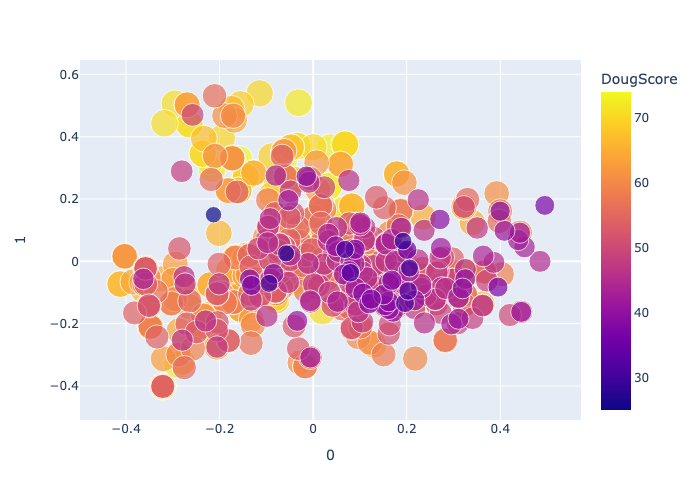

In [14]:
fig = px.scatter(df_models, x='0', y='1', color='DougScore', size='DougScore', hover_data=["model", "DougScore"])
fig.show("png")

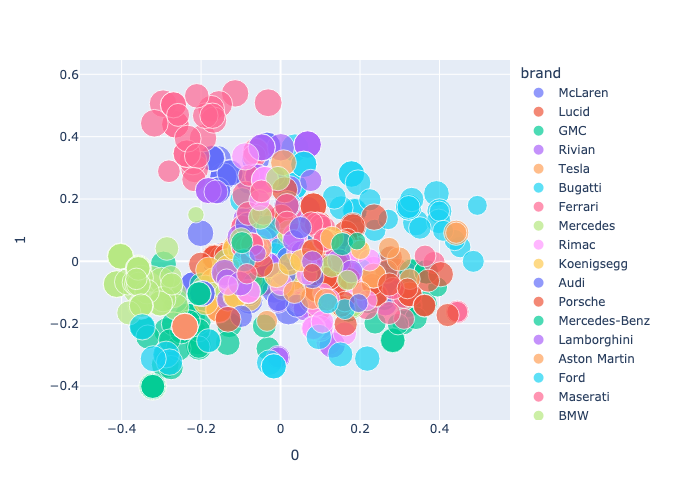

In [15]:
fig = px.scatter(df_models, x='0', y='1', color='brand', size='DougScore', hover_data=["model", "DougScore"])
fig.show("png")